# Some practice problems

Nipun Batra  
2024-02-13

<figure>
<a
href="https://colab.research.google.com/github/nipunbatra/ml-teaching/blob/master/notebooks/lin-reg-tutorial.ipynb"><img
src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
<figcaption>Open In Colab</figcaption>
</figure>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

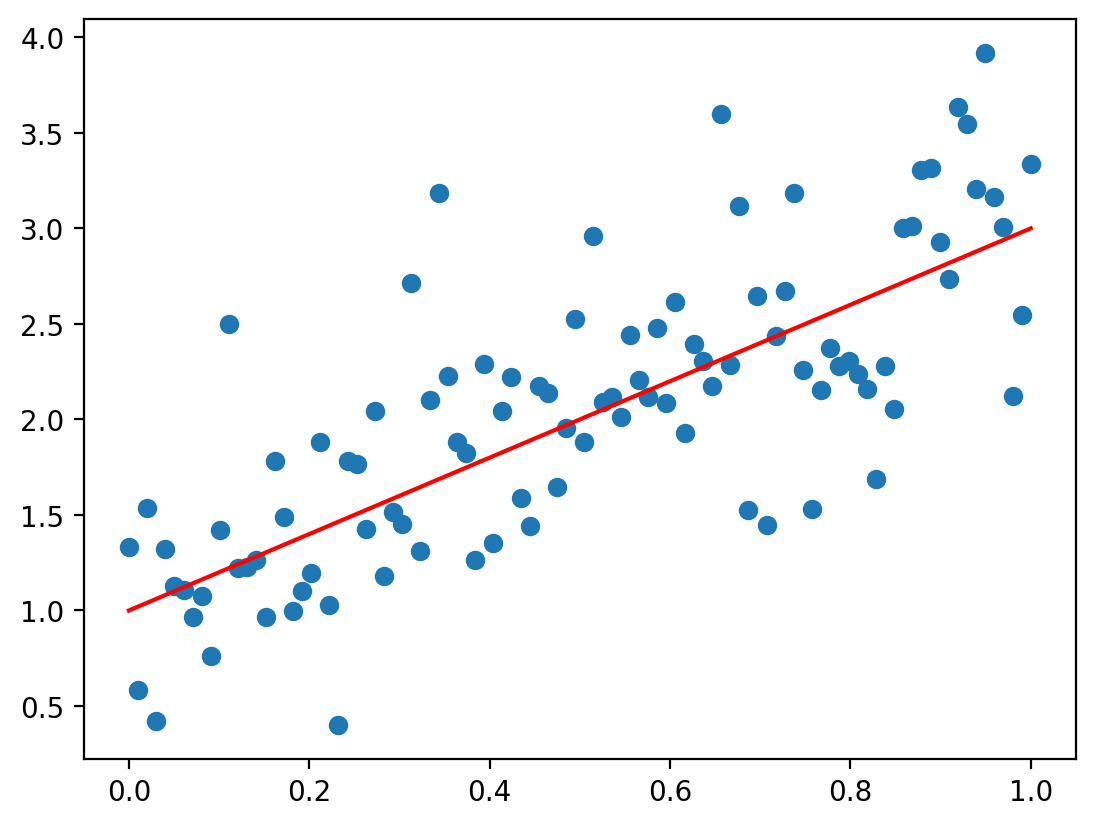

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Create some data
x = np.linspace(0, 1, 100).reshape(-1, 1)
f_x = 2 * x + 1
eps = np.random.randn(100, 1)*0.5
y = f_x + eps

plt.scatter(x, y, label='Data')
plt.plot(x, f_x, 'r', label='True function')


In [9]:
lr = LinearRegression()
penalty_matrix = np.diag(np.eye(x.shape[0]))
penalty_matrix

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

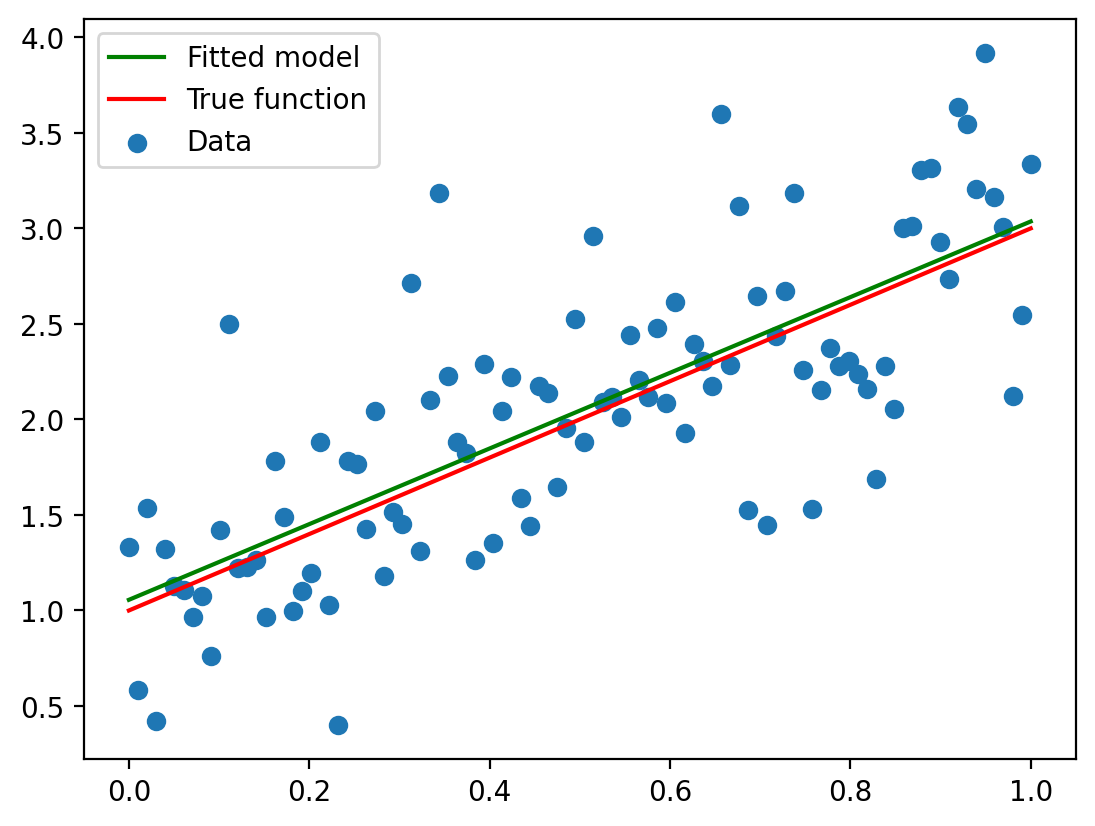

In [13]:
lr.fit(x, y, sample_weight=penalty_matrix)
lr.coef_, lr.intercept_
plt.plot(x, lr.predict(x), 'g', label='Fitted model')
plt.plot(x, f_x, 'r', label='True function')
plt.scatter(x, y, label='Data')
plt.legend()

[[1.9804156]] [1.05585787]

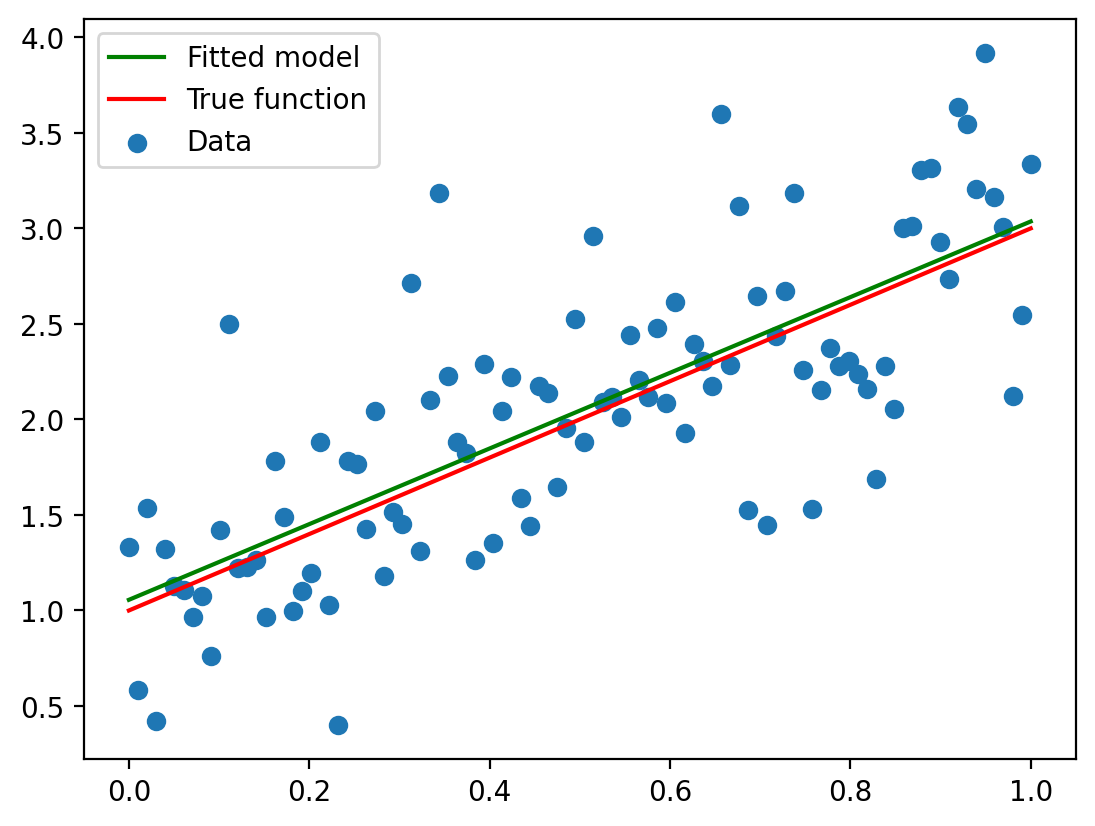

In [16]:
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_, lr.intercept_)
plt.plot(x, lr.predict(x), 'g', label='Fitted model')
plt.plot(x, f_x, 'r', label='True function')
plt.scatter(x, y, label='Data')
plt.legend()

[[1.94435821]] [1.08001753]

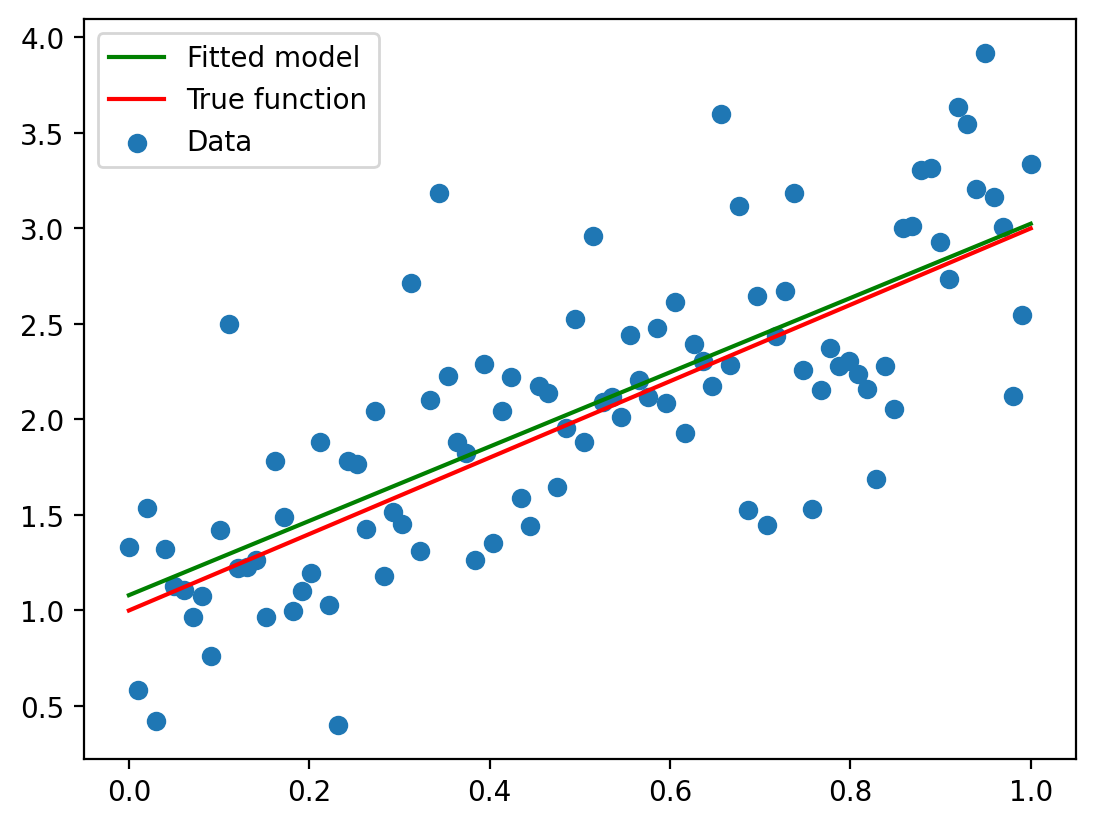

In [17]:
penalty_matrix = np.linspace(0, 1, 100)

lr = LinearRegression()
lr.fit(x, y, sample_weight=penalty_matrix)
print(lr.coef_, lr.intercept_)

plt.plot(x, lr.predict(x), 'g', label='Fitted model')
plt.plot(x, f_x, 'r', label='True function')
plt.scatter(x, y, label='Data')
plt.legend()

In [18]:
R = np.diag(penalty_matrix)
print(R)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01010101 0.         ... 0.         0.         0.        ]
 [0.         0.         0.02020202 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.97979798 0.         0.        ]
 [0.         0.         0.         ... 0.         0.98989899 0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]

In [19]:
x_aug = np.hstack([np.ones_like(x), x])
theta_hat= np.linalg.inv(x_aug.T @ R @ x_aug) @ x_aug.T @ R @ y
print(theta_hat)

[[1.08001753]
 [1.94435821]]

$\hat{y} = x^T\theta$

In [20]:
lr = LinearRegression(fit_intercept=False)
lr.fit(x, y)
print(lr.coef_, lr.intercept_)

[[3.55624367]] 0.0

In [25]:
sum_x_y = np.sum(x * y)
sum_x_x = np.sum(x * x)

sum_x_y/sum_x_x

3.5562436711266945

$\hat{y} = \theta$

In [27]:
lr = LinearRegression(fit_intercept=False)
lr.fit(np.ones_like(y), y)
print(lr.coef_, lr.intercept_)

[[2.04606567]] 0.0

In [28]:
np.mean(y)

2.0460656658200334